In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
alpha = 2e-1
beta = 1e-1
gamma = 2e-1
delta = 1e-1

In [3]:
def equa(t, x, y):
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])

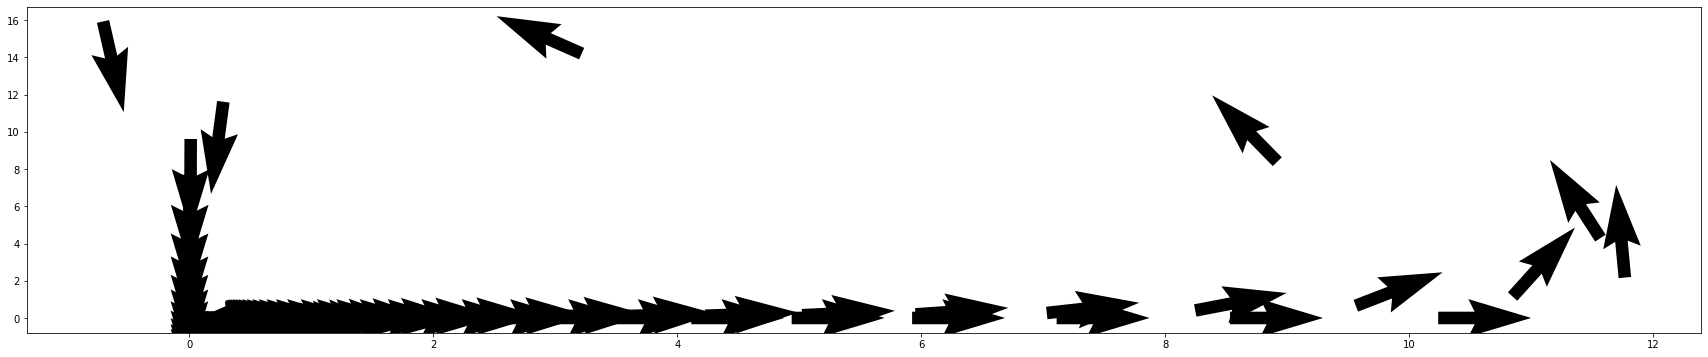

In [4]:
plt.figure(figsize=(30, 6))
begin = 1/4
end = 1/2
for i in range(100):
    vector_x, vector_y = equa(0, begin, end)
    plt.quiver(begin, end, vector_x, vector_y)
    begin += vector_x
    end += vector_y

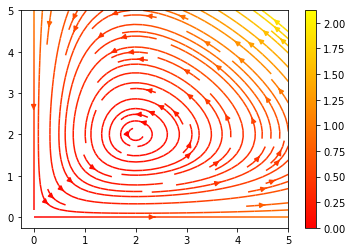

In [5]:
fig = plt.figure()
Y, X = np.mgrid[0:5:1000j, 0:5:1000j]
U, V = equa(0, X, Y)
# plt.streamplot(X, Y, U, V, density=1, color=U, cmap="autumn")
fig.colorbar(plt.streamplot(X, Y, U, V, color=np.sqrt(U**2+V**2), cmap="autumn").lines)

In [6]:
def H(x, y):
    return delta*x - gamma*np.log(x) + beta*y - alpha*np.log(y)

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed",
        levels=levels
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

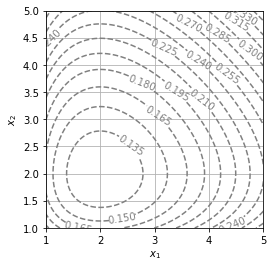

In [7]:
display_contour(H, np.linspace(1, 5, 1000), np.linspace(1, 5, 1000), 20)

In [8]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = np.linspace(t0, tf, int((tf-t0)/dt))
    x = np.zeros(shape=(len(x0), len(t)))
    x[:, 0] = x0
    
    for i in range(len(t)-1):
        x[:, i+1] = x[:, i] + dt * f(t, *x[:, i])
    return t, x

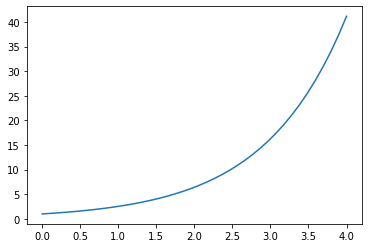

In [9]:
def expo(t, x):
    return x

t, x = solve_euler_explicit(expo, [1], 1e-1, 0, 4)
plt.plot(t, x[0,:])

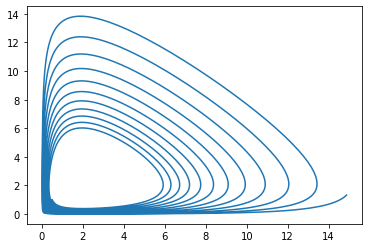

In [11]:
t, x = solve_euler_explicit(equa, [1/2, 1], 1e-1, 0, 500)
plt.plot(x[0, :], x[1, :])

In [41]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax=100):
    
    t = np.linspace(t0, tf, int((tf-t0)/dt))
    x = np.zeros(shape=(len(x0), len(t)))
    x[:, 0] = x0
    
    for i in range(len(t)-1):
        
        def F(x_i):
            return x[:,i] + dt*f(t[i+1], *x_i)
            
        result = x[:,i] + dt*f(t[i], *x[:,i])
        for _ in range(itermax):
            result = F(result)
        x[:, i+1] = result
        
    return t, x

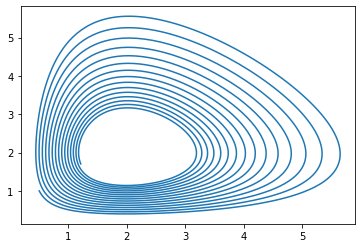

In [42]:
t, x = solve_euler_implicit(equa, [1/2, 1], 1e-1, 0, 500)
plt.plot(x[0, :], x[1, :])